In [1]:
import tensorflow as tf

In [2]:
#model = tf.keras.models.load_model('backbone_head_5')

In [3]:
'''
import os
import numpy as np
from collections import defaultdict
from sklearn.metrics import accuracy_score

import cv2
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.utils import img_to_array

def model_predict(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img,(224,224))

    img = preprocess_input(img)
    
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array,0)
    prob = model.predict(img_array)
    return prob



def simple_voting_inference(video_directory, threshold=0.5,video_number = 0):
    actor_probabilities = defaultdict(list)

    count = 0
    # Iterate over each frame file in the video directory
    for frame_file in os.listdir(video_directory):
        frame_path = os.path.join(video_directory, frame_file)
        # Extract frame number and actor number from the file name
        _, actor_number = frame_file.split('.')[0].split('_')
        print(f'Video: {video_number} File: {count} Actor: {actor_number}')
        count+=1
        # Get the model's probability that the frame is real
        prob_real = model_predict(frame_path)
        # Append the probability to the actor's list of probabilities
        actor_probabilities[actor_number].append(prob_real)

    # Average the probabilities for each actor and apply the threshold
    actor_classification = {actor: 'Fake' if np.mean(probs) <= threshold else 'Real'
                            for actor, probs in actor_probabilities.items()}

    # Apply voting scheme: if any actor is classified as fake, the video is fake
    video_classification = 'Fake' if 'Fake' in actor_classification.values() else 'Real'

    return video_classification,actor_probabilities,actor_classification

def calculate_accuracy(val_directory, threshold=0.5):
    true_labels = []
    pred_labels = []

    count = 1
    # Process fake videos
    fake_videos_path = os.path.join(val_directory, 'FAKE')
    for video_name in os.listdir(fake_videos_path):
        video_path = os.path.join(fake_videos_path, video_name)
        video_classification,_,_ = simple_voting_inference(video_path, threshold,count)
        print(f'Fake Video {video_name} with count {count} classified as {video_classification}')
        count+=1
        true_labels.append('Fake')
        pred_labels.append(video_classification)

    # Process real videos
    real_videos_path = os.path.join(val_directory, 'REAL')
    for video_name in os.listdir(real_videos_path):
        video_path = os.path.join(real_videos_path, video_name)
        video_classification,_,_ = simple_voting_inference(video_path, threshold,count)
        print(f'Real Video {video_name} with count {count} classified as {video_classification}')
        count+=1
        true_labels.append('Real')
        pred_labels.append(video_classification)

    # Calculate accuracy
    label_encoder = {'Fake': 0, 'Real': 1}
    true_labels_encoded = [label_encoder[label] for label in true_labels]
    pred_labels_encoded = [label_encoder[label] for label in pred_labels]

    # Calculate accuracy
    accuracy = accuracy_score(true_labels_encoded, pred_labels_encoded)
    return accuracy

video_path = '../biometric_project/data/faces_subset_train_sample_videos_paper_implementation - Copy/val/REAL/aytzyidmgs/'
video_classification,actor_probabilities,actor_classification = simple_voting_inference(video_path)
print(video_classification)
print(actor_probabilities)
print(actor_classification)

accuracy_voting = calculate_accuracy('../biometric_project/data/faces_subset_train_sample_videos_paper_implementation - Copy/train/')
print(f"Accuracy: {accuracy_voting:.2f}")
'''


'\nimport os\nimport numpy as np\nfrom collections import defaultdict\nfrom sklearn.metrics import accuracy_score\n\nimport cv2\nimport numpy as np\nfrom tensorflow.keras.applications.efficientnet import preprocess_input\nfrom tensorflow.keras.utils import img_to_array\n\ndef model_predict(image_path):\n    img = cv2.imread(image_path)\n    img = cv2.resize(img,(224,224))\n\n    img = preprocess_input(img)\n    \n    img_array = img_to_array(img)\n    img_array = np.expand_dims(img_array,0)\n    prob = model.predict(img_array)\n    return prob\n\n\n\ndef simple_voting_inference(video_directory, threshold=0.5,video_number = 0):\n    actor_probabilities = defaultdict(list)\n\n    count = 0\n    # Iterate over each frame file in the video directory\n    for frame_file in os.listdir(video_directory):\n        frame_path = os.path.join(video_directory, frame_file)\n        # Extract frame number and actor number from the file name\n        _, actor_number = frame_file.split(\'.\')[0].split(

In [41]:
import numpy as np
import h5py
def load_predictions(h5_filename):
    video_probabilities = {}
    with h5py.File(h5_filename, 'r') as h5_file:
        for key in h5_file.keys():
            # Extract the video number from the file name
            # Assuming the format is 'fake_{video_number}' or 'real_{video_number}'
            video_number = int(key.split('_')[-1])  # Get the last part after '_'
            probabilities = np.array(h5_file[key]).flatten()
            video_probabilities[video_number] = probabilities
    return video_probabilities

video_probabilities = load_predictions('predictions.h5')

In [44]:

import os
import numpy as np

import cv2
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.utils import img_to_array

import os
import numpy as np
from collections import defaultdict
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

def standard_inference(video_probabilities, threshold=0.5, video_number = 0):
    # Collect all frame predictions
    frame_predictions = video_probabilities[video_number]

    # Average probability across all frames
    avg_prob_real = np.mean(frame_predictions)

    # Classify based on the average probability
    return 'Real' if avg_prob_real >= threshold else 'Fake'

def calculate_accuracy(threshold=0.5):
    true_labels = []
    pred_labels = []

    # Process fake videos
    for count in range(1,23):

        video_classification = standard_inference(video_probabilities, threshold,count)
        #print(f'Fake Video  with count {count} classified as {video_classification}')

        true_labels.append('Fake')
        pred_labels.append(video_classification)

    # Process real videos

    for count in range(23,44):
        
        video_classification = standard_inference(video_probabilities, threshold,count)
        #print(f'Real Video with count {count} classified as {video_classification}')
        count +=1
        true_labels.append('Real')
        pred_labels.append(video_classification)

    # Calculate accuracy
    label_encoder = {'Fake': 0, 'Real': 1}
    true_labels_encoded = [label_encoder[label] for label in true_labels]
    pred_labels_encoded = [label_encoder[label] for label in pred_labels]

    conf_matrix = confusion_matrix(true_labels_encoded, pred_labels_encoded)
    
    target_names = ['Fake', 'Real']
    clas_report = classification_report(true_labels_encoded, pred_labels_encoded, target_names=target_names)


    # Calculate accuracy
    accuracy = accuracy_score(true_labels_encoded, pred_labels_encoded)
    auc_score = roc_auc_score(true_labels_encoded, pred_labels_encoded)
    return accuracy, conf_matrix, clas_report,auc_score


accuracy, conf_matrix, clas_report, auc_score = calculate_accuracy(0.05)

print(f"Accuracy: {accuracy:.2f}")
print(f"AUC: {auc_score:.2f}")
print('Confusion Matrix \n', conf_matrix)
print('Classification Report \n', clas_report)


Accuracy: 0.91
AUC: 0.91
Confusion Matrix 
 [[19  3]
 [ 1 20]]
Classification Report 
               precision    recall  f1-score   support

        Fake       0.95      0.86      0.90        22
        Real       0.87      0.95      0.91        21

    accuracy                           0.91        43
   macro avg       0.91      0.91      0.91        43
weighted avg       0.91      0.91      0.91        43



c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

0.9069767441860465
13


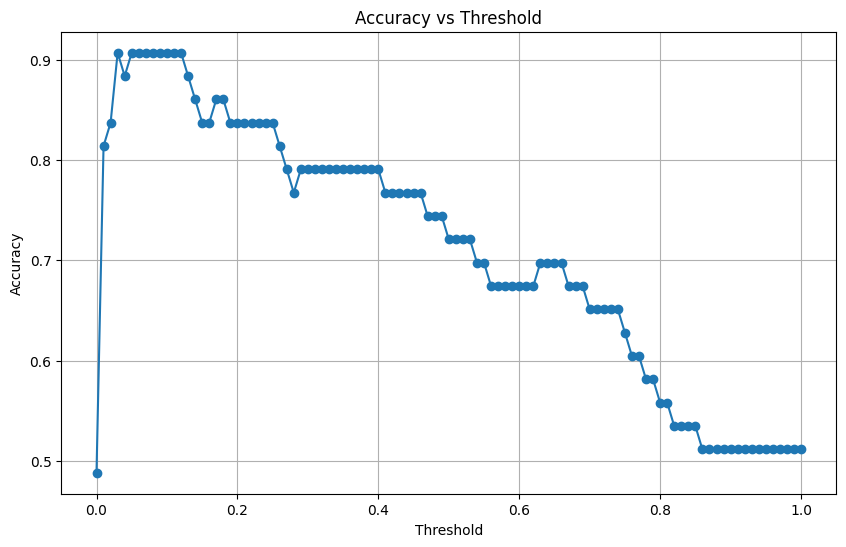

In [38]:
import matplotlib.pyplot as plt
thresholds = np.linspace(0, 1, 101)  # 100 points from 0 to 1
accuracies = [calculate_accuracy(t)[0] for t in thresholds]
print(np.max(accuracies))
print(len(accuracies) - np.argmax(np.flip(accuracies)-1))
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, marker='o')
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()